#### CAR PRICE PREDICTION 

<a id="toc"></a>

<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Contents</h3>
    
* [Data](#0)
* [Importing Libraries](#1)
* [Data Loading](#2)

* [Exploratory Data Analysis](#3)

   
    * [Data Preprocessing / Visualizations](#4)
    * [Target Variable](#5)
    * [Numerical Features](#6)
    * [Categorical Features](#7)    
    
* [Model Selection](#8)    
    * [Baseline Model](#9)
    * [Models with Ridge & Lasso & ElasticNet](#10)
    * [Models with SVR, DecisionTree, Random Forest & Gradient Boosting](#11)    
    * [Best Model with Hyperparameter Tuning](#12)
    * [Feature Importance](#13)    


* [Conclusion](#14)


<a id="0"></a>
<font color="lightseagreen" size=+2.5><b>Data</b></font>

| Feature           | Description                                             |
|-------------------|---------------------------------------------------------|
| Car_ID            | Unique id of each observation                           |
| Symboling         | Assigned insurance risk rating                          |
| carCompany        | Name of car company                                     |
| fueltype          | Car fuel type (gas or diesel)                           |
| aspiration        | Aspiration used in a car                                |
| doornumber        | Number of doors in a car                                |
| carbody           | Body of car                                             |
| drivewheel        | Type of drive wheel                                     |
| enginelocation    | Location of car engine                                  |
| wheelbase         | Wheelbase of car                                        |
| carlength         | Length of car                                           |
| carwidth          | Width of car                                            |
| carheight         | Height of car                                           |
| curbweight        | Weight of a car without occupants or baggage           |
| enginetype        | Type of engine                                          |
| cylindernumber    | Number of cylinders placed in the car                   |
| enginesize        | Size of car engine                                      |
| fuelsystem        | Fuel system of car                                      |
| boreratio         | Bore ratio of car                                       |
| stroke            | Stroke or volume inside the engine                      |
| compressionratio  | Compression ratio of car                                |
| horsepower        | Horsepower                                              |
| peakrpm           | Car peak rpm                                            |
| citympg           | Mileage in city                                         |
| highwaympg        | Mileage on highway                                      |
| price             | Price of car                                            |


<a id="1"></a>
<font color="lightseagreen" size=+2.5><b>Importing Libraries</b></font>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import  RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import  DecisionTreeRegressor


import warnings
warnings.filterwarnings('ignore')

In [8]:
#defualt settings
pd.set_option('display.max.columns',50)
sns.set(style='darkgrid', font_scale=1.5)

<a id="2"></a>
<font color="lightseagreen" size=+2.5><b>Data Loading</b></font>

In [11]:
import os

for dirname, _, filenames in os.walk('dataset/'):
    for file in filenames:
        path = os.path.join(dirname, file)
        print(path)

train_data = pd.read_csv(f'{path}')

dataset/car-details.csv


In [14]:
#displaying the first 5 rows
train_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<a id="3"></a>
<font color="lightseagreen" size=+2.5><b>Exploratory Data Analysis</b></font>

1. Checking the dimensions of the Datasets

In [15]:
print('Train Dataset has ', train_data.shape[0], 'Records/Row and ', train_data.shape[1], 'features/columns', '\n')

Train Dataset has  205 Records/Row and  26 features/columns 



2. General Information

In [16]:
train_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Columns: 26 entries, car_ID to price
dtypes: float64(8), int64(8), object(10)
memory usage: 41.8+ KB


Inferences:
1. There is a total of 205 record entries and 26 column entries
2. The common data-types includes float64, int64 and object
3. Out of the 26 columns: 
   <ul>
      <li> 16 columns are numerical and </li>
      <li> 10 columns are categorical </li>
   </ul>

3. Overall Statistics on Catergorical Data

In [18]:
train_data.describe(include='object')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


Inferences:
1. Most of the categorical fetaures are not having high cardinality
2. Features like CarName is having a high cardinality. It will be either reduced or dropped.

4. Checking for Duplicate Values

In [19]:
train_data.duplicated().sum()

0

5. Checking for Missing Values

In [20]:
null_df = round(
    train_data.isnull().sum()/ len(train_data) * 100
,2).sort_values().to_frame().rename(columns={
    0:'Train Data % of Missing Values'
})

In [21]:
null_df

,Train Data % of Missing Values
car_ID,0.0
citympg,0.0
peakrpm,0.0
horsepower,0.0
compressionratio,0.0
stroke,0.0
boreratio,0.0
fuelsystem,0.0
enginesize,0.0
cylindernumber,0.0


Inference:
1. There are no missing values in the data.

6. General Overview

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

7. Overall Statistics

In [23]:
train_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Inference:
1. The car_ID is a repetition on index as such it will be dropped.

In [24]:
train_data.drop(columns=['car_ID'], inplace=True)

In [25]:
train_data.sample()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
146,0,subaru trezia,gas,std,four,wagon,fwd,front,97.0,173.5,65.4,53.0,2290,ohcf,four,108,2bbl,3.62,2.64,9.0,82,4800,28,32,7463.0


<a id="4"></a>
<font color="lightseagreen" size=+2.5><b>Data Preprocessing/ Visualizations</b></font>

1. The Target Feature

In [26]:
train_data['price'].describe().to_frame()

,price
count,205.000000
mean,13276.710571
std,7988.852332
min,5118.000000
25%,7788.000000
50%,10295.000000
75%,16503.000000
max,45400.000000


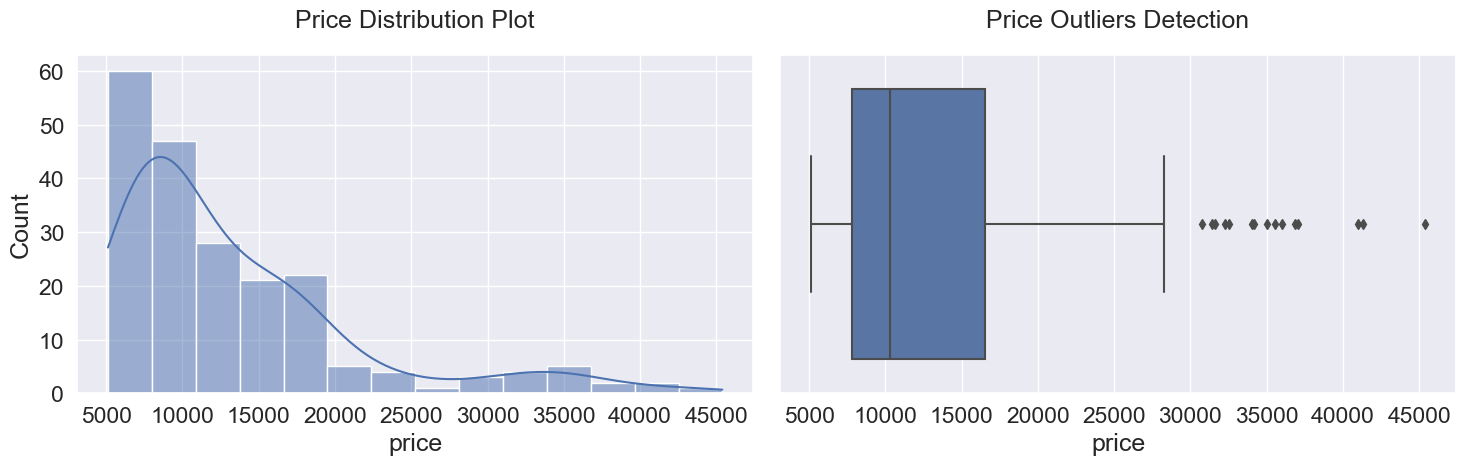

In [31]:
#visualzing the data

#increasing the figure size
plt.figure(figsize=(15,5))

#subplot 1
plt.subplot(1,2,1)
sns.histplot(
    train_data['price'], kde=True
)
plt.title("Price Distribution Plot",pad=20)

#subplot 2
plt.subplot(1,2,2)
sns.boxplot(
    x=train_data['price']
)
plt.title("Price Outliers Detection",pad=20)

plt.tight_layout()
plt.show()

Inferences:
1. The Price is right skewed indicating the presence of positive outliers
2. The Target Feature doesn't follow a normal distribution due to it skewness it will be transformed to acheive a Normal Distribution before performing regression

2. Car Name

In [35]:
train_data['CarName'].str.split().str[0].value_counts()

CarName
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: count, dtype: int64

Inferences:
1. The CarName Feature doesn't seem like an important feature for predicting car price and as such it will be dropped. Also there are too much typos

In [38]:
train_data.drop(columns=['CarName'], inplace=True)

3. Numerical Features

In [56]:
#selecting Numerical features
num_col= train_data.select_dtypes(exclude='object')

In [57]:
pd.DataFrame({
    'Features': [col for col in num_col.columns],
    'Number of Unique Values': [train_data[col].nunique() for col in num_col.columns],
    'Discrete Values': [1 if train_data[col].nunique()< 20 else 0  for col in num_col.columns],
    'Continuous Features': [1 if num_col[col].nunique() > 20 else 0 for col in num_col ]
})

,Features,Number of Unique Values,Discrete Values,Continuous Features
0,symboling,6,1,0
1,wheelbase,53,0,1
2,carlength,75,0,1
3,carwidth,44,0,1
4,carheight,49,0,1
5,curbweight,171,0,1
6,enginesize,44,0,1
7,boreratio,38,0,1
8,stroke,37,0,1
9,compressionratio,32,0,1


In [58]:
num_col_list = num_col.columns.to_list()
num_col_list.remove('price')
num_col_list.remove('symboling')

A. Visualizing Continuous Features

In [64]:
#selecting continuous features
cons_cols =num_col_list

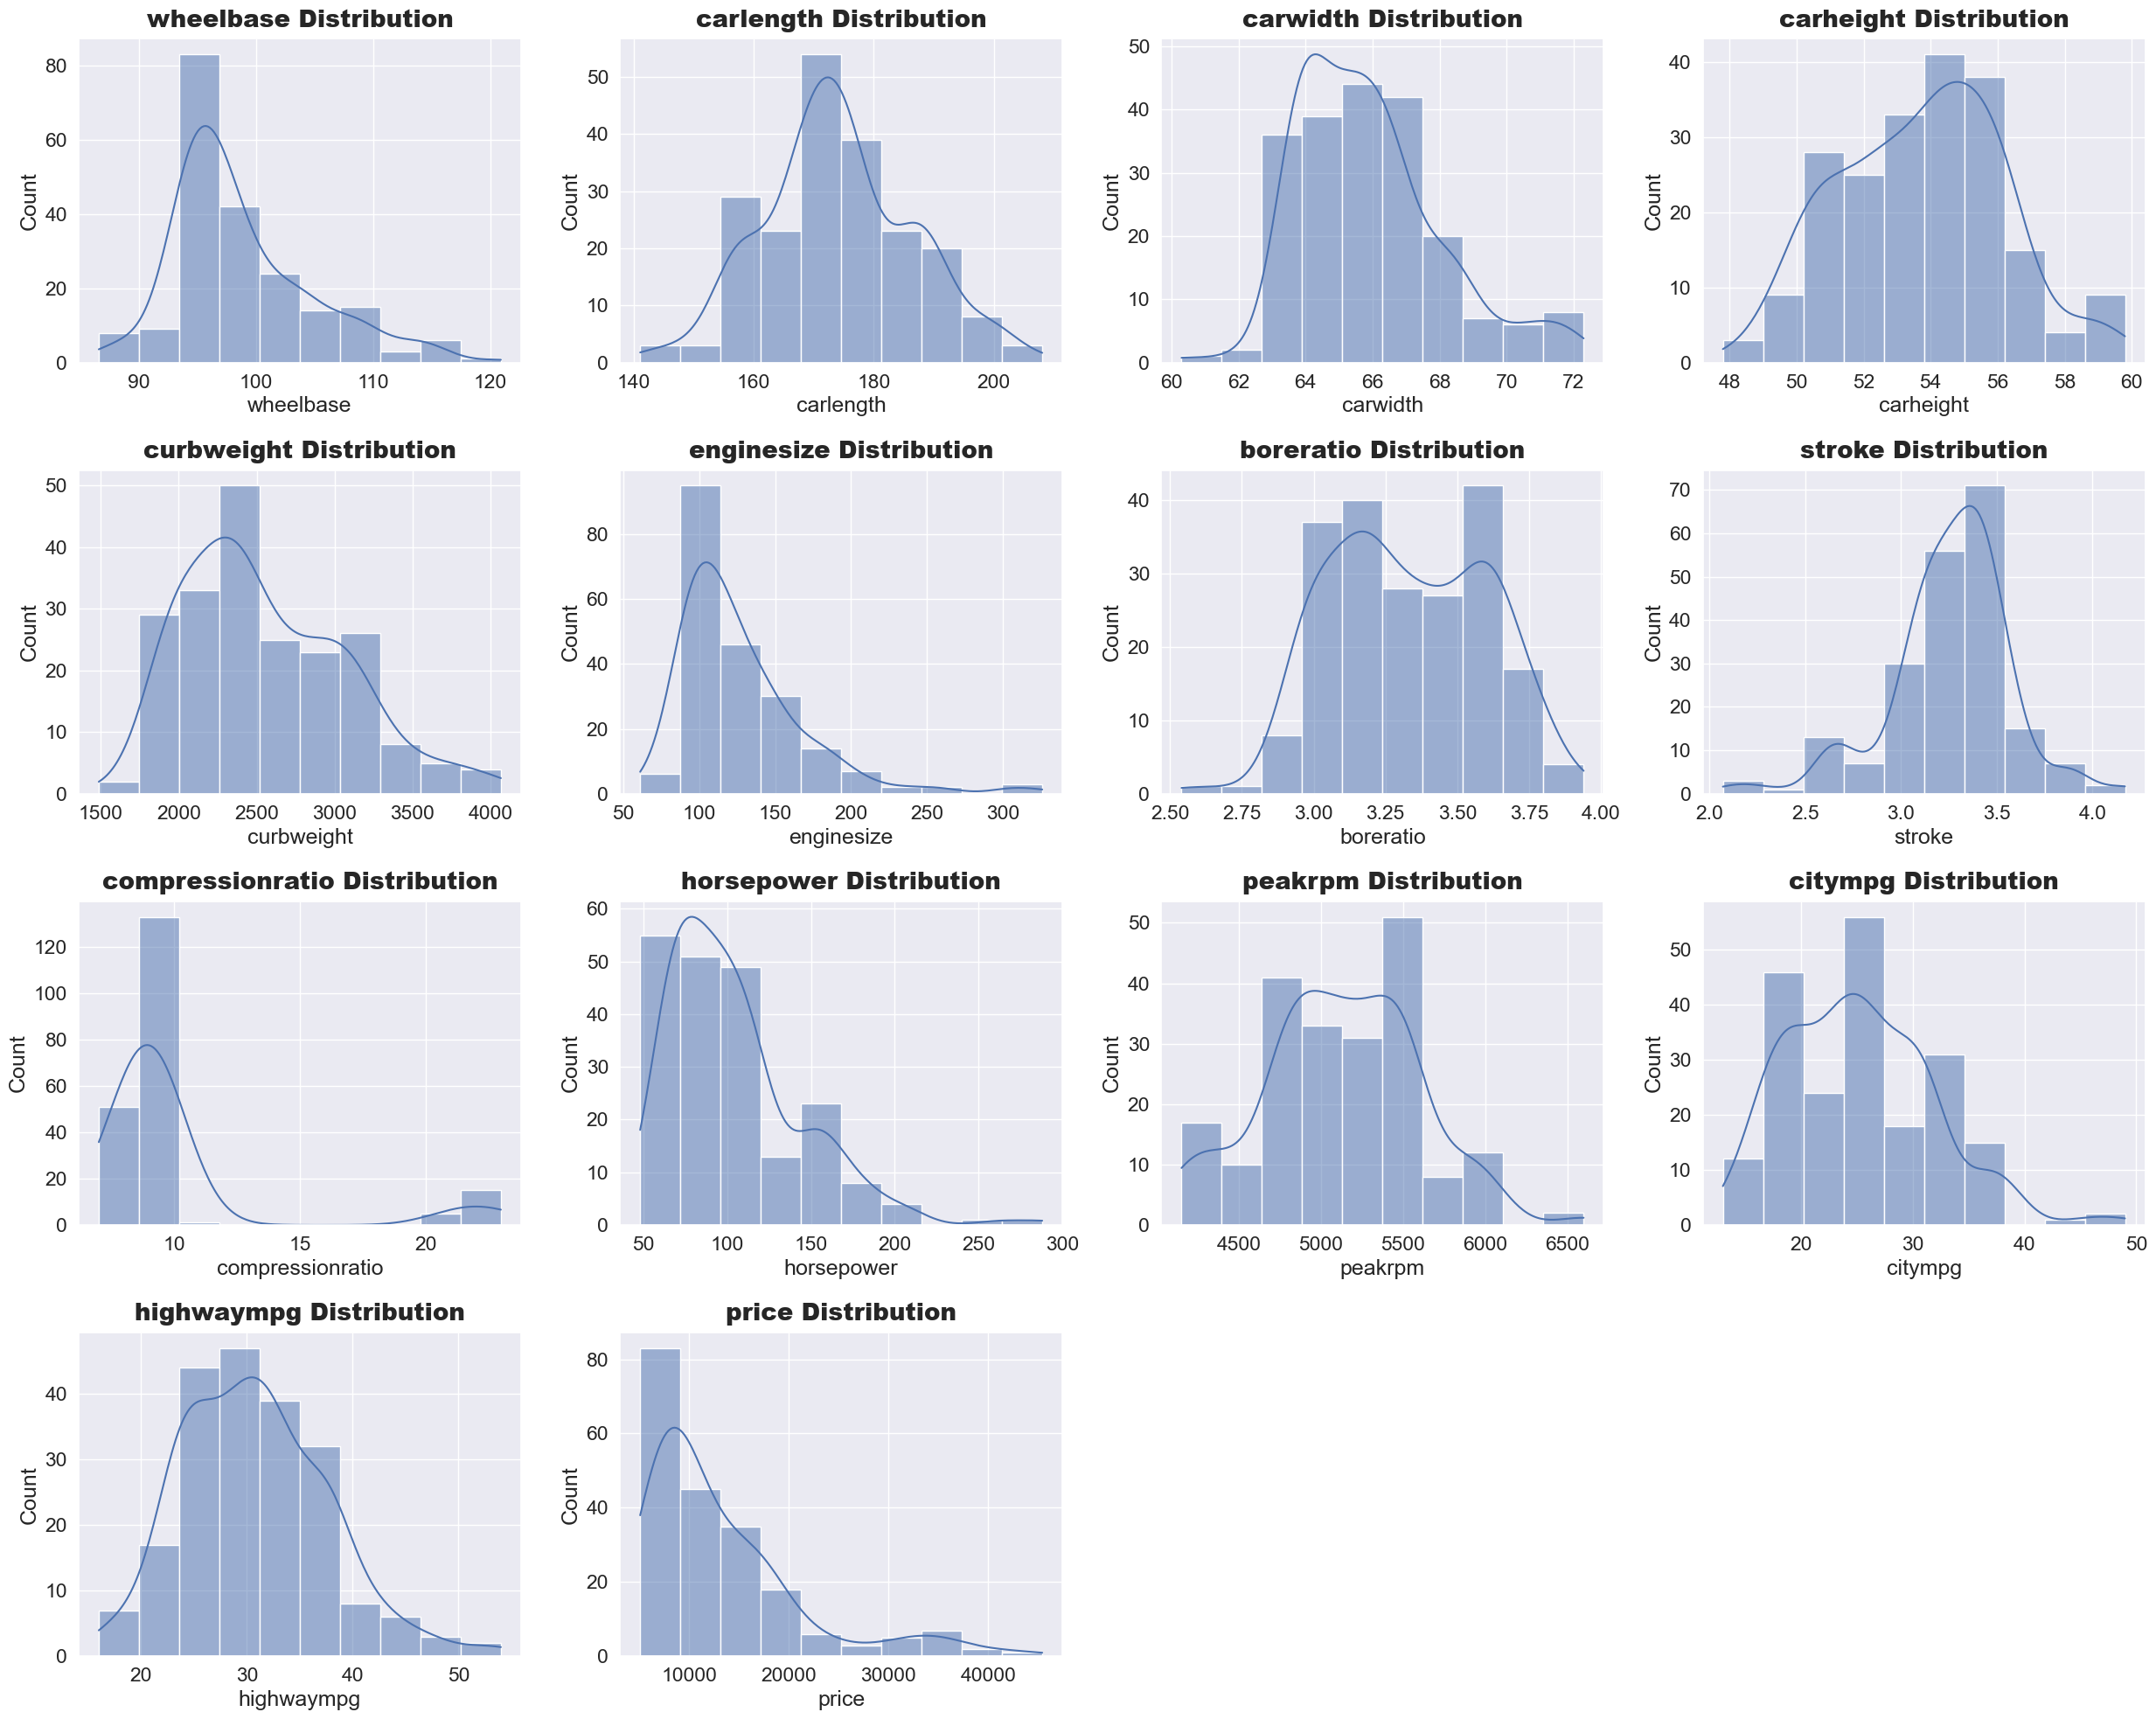

In [76]:
#increasing the figure size
plt.figure(figsize=(25,20))


for idx, val in enumerate(cons_cols):
    plt.subplot(4,4,idx+1)

    sns.histplot(
        train_data[val], bins=10, kde=True
    )
    plt.title(f"{val} Distribution",fontweight="black",size=20,pad=10)
    plt.tight_layout()

B. Checking Skewness Values

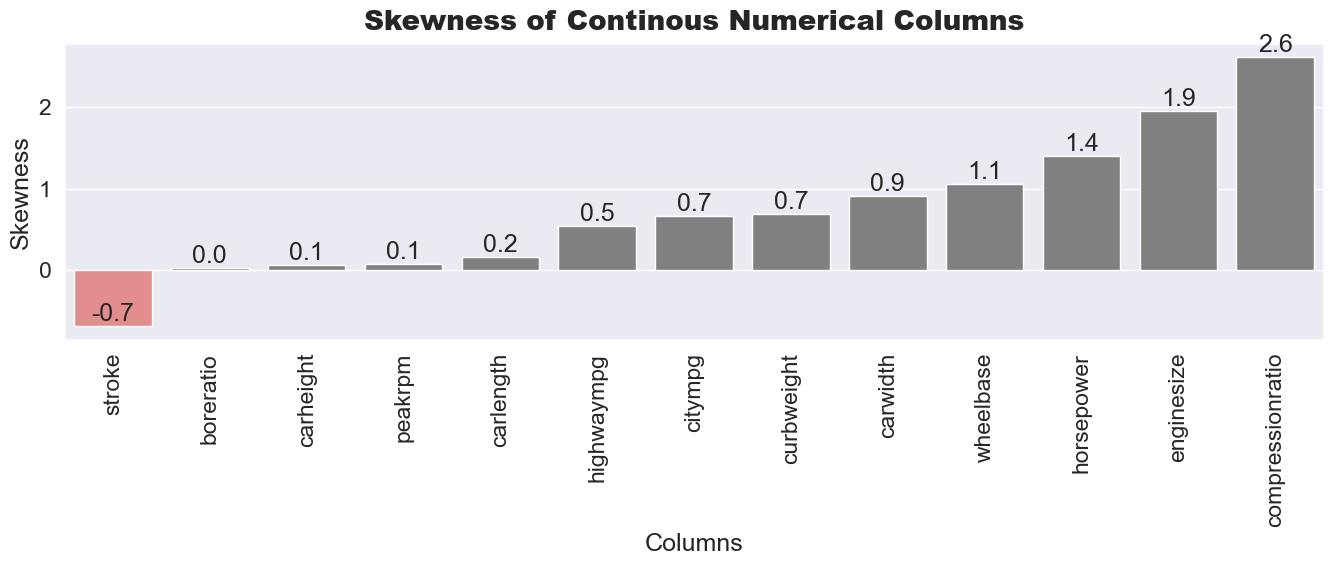

In [72]:
skewness = train_data[cons_cols].skew().sort_values()
plt.figure(figsize=(14,6))


sns.barplot(
    x=skewness.index,
    y=skewness.values,
    palette=[ '#808080' if v >=0 else 'lightcoral' for v in skewness]
)
for idx, val in enumerate(skewness):
    plt.text(idx, val, f'{val:.1f}', ha='center', va='bottom')
plt.ylabel("Skewness")
plt.xlabel("Columns")
plt.xticks(rotation=90)

plt.title("Skewness of Continous Numerical Columns",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()

C. Correlation w.r.t Price

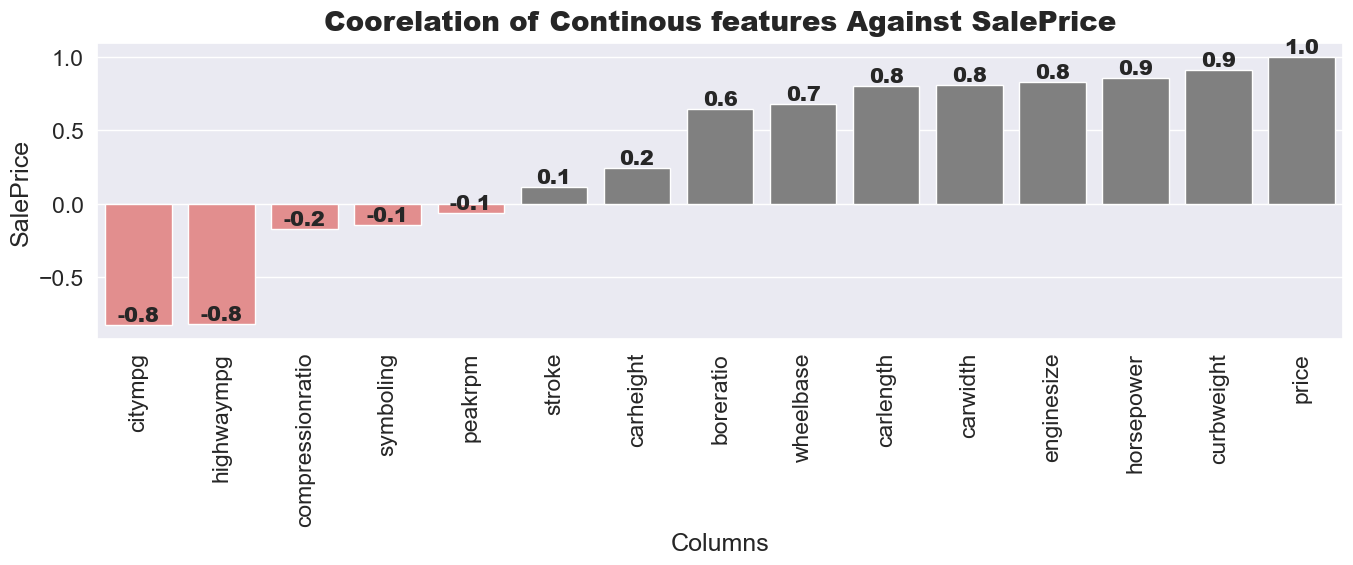

In [75]:
#adding salePrice
cons_cols.append("price")
corr = train_data[con_cols].corr(method='spearman')['price'].sort_values()
plt.figure(figsize=(14,6))

sns.barplot(
    x=corr.index, y=corr.values, palette=['#808080' if v >0 else 'lightcoral' for v in corr]
)

for idx, val in enumerate(corr):
    plt.text(idx, val, f'{val:.1f}', va='bottom', ha='center', size=15, fontweight='black')

plt.title("Coorelation of Continous features Against SalePrice",fontweight="black",size=20,pad=10)
plt.ylabel("SalePrice")
plt.xlabel("Columns")
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()